## Introduction to Evolutionary Algorithm

<img src="pic/gene/evo.jpg" width=400 height=400>

An Evolutionary Algorithm (EA) is a subset of evolutionary computation, a generic population-based metaheuristic optimization algorithm. It uses mechanisms inspired by biological evolution, such as reproduction, mutation, recombination, and selection. It us frequently used to find optimal or near-optimal solutions to difficult problems which otherwise would take a lifetime to solve. It is frequently used to solve optimization problems, in research, and in machine learning.

Evolutionary algorithms have three main characteristics as oppsed to traditional algorithms: 

1. **`Population-Based`**: Evolutionary algorithms are optimized through population -- which is the set of current solutions. New solutions are generated from this population through crossover and mutations.

2. **`Fitness-Oriented`**: As we need loss functions to determine the best results, evolutionary algorithms utilize **Fitness** to evaluate how good the solution is.


3. **`Variation-Driven`**: As the size of the problem grows, it's impossible to cover all the possibilities in population. Generally speaking, we can generate a population that contains some portion of the entire feasible solutions. If there is no better solution throughout the current population, Evolutionary Algorithms are able to crossover and mutate and generate new solutions that might be better than all in the current population. Namely, Evolutionary Algorithms are driven by mutation to generate new better solutions.

## Genetic Algorithm

In the field of computer science and operation reseach, a **`Genetic Algorithm`** (GA) is a **search-based metaheuristic optimization method** inspired by natural selection processes. It is also a **random-based** evolutionary algorithm, which means that random changes are applied to current solutions to generate new solutions. It is also called Bionics Genetic Algorithm, as it is a learned evolution process from looking at various natural species as they evolve. Genetic Algorithm has its core idea from **`Charles Darwin's theory of natural evolution -- "survival of the fittest"`**. Better genes are kept along through a series of crossovers and mutations. It is a slow and gradual process that makes slight changes to current solutions. After a number of epochs, we can get a better result compared to the initial one.

Genetic Algorithm is widely used in the world of data science. For example, genetic algorithm can be used to optimize the structure of artifical neural network. Meanwhile, it is highly used in image sementation and enhancement. 

In general, Genetic Algorithm includes the following steps:

<img src="pic/gene/flow.png" width=600 height=600>

**The algorithm runs as below:**


1. The algorithm begins by randonly creating initial population.


2. Evaluate seach member of the current population by calculating its fitness value.


3. Decide whether or not to terminate this algorithm. If yes, output the best result by selecting the route with the highest fitness value in the current population. If not, continue the following process.


4. Select parents for later crossover and mutation, processes that generate new population. 


5. Produce children from the parents. Children are produced either by making random changes -- *mutation* -- or by interchanging certain part of the solution with another parent -- *crossover*.


6. Evaluate the each member of the new population again. Loop from step 2 again until the algorithm terminates at step 3.

Below is some definition for the terms in the Genetic Algoirthm:

***Fitness***

Fitness is the objective metrics for evaluating the solution through which populations can compete. Fitness function can be complex to define and implement, as it needs to point in the direction of a solution, which might be difficult if your problem is not by nature comparable.


***Population & Individual***

A population is a set of possible solutions which, later in the algorithm, compete against one another in terms of fitness value. The solution with a higher fitness value is selected to for later generations. An individual is one possible route and is contained in the population. Individuals with high fitness value is passed into the crossover and mutation process.


***Generation***

One generation is one iteration of the steps shown above. The first generation is initialized randomly, and the successive generations are derived from individuals with high fitness score from the previous generations.


***Crossover***

Crossover happens after individuals with high fitness value are selected. In genetic algorithm, it randomly selects vector entries, or genes (part of the individual), from a pair of individuals in the current generation and combines them to form a child.


***Mutation***

Mutation is the process of randomly changing a certain part of the individual. Mutation is cruicial in genetic algorithms in that it helps by looking over wider, untouched search space, thereby possibly giving solutions that can help avoid local optimums.

In this notebook we will discuss what each step does and implements the process through Python.

## Solving Traveling Salesman Problem

<img src="pic/gene/tsp.png" height=350 width=350>

The Travelling Salesman Problem (aka. TSP) asks the following question: 

**"Given a set of cities and distances between each pair of cities, what is the shortest route that can visit each city once and return to the original starting city?"**

This is an classic NP-hard problem and is still under rapid research in the field of operations research and computer science. As an NP-hard problem, it's easy to see whether one solution is a feasible one -- in the TSP problem means **visit each city once and return to the original starting city**. However, it's extremly difficult to know whether one solution is optimal. In other words, finding global optimum is really difficult for the TSP problem.



**Why is it difficult to find the optimal solution to a TSP problem?**

Let's assume there are 5 cities. The total possible routes contains

$$(5!)/5 = 24$$

However, if we have 15 cities, the total possible solutions are 

$$(15!)/15 > 87,000,000,000$$

which is arguably unsolvable using traditional appraoch.

**Here's why a genetic algorithm can do pretty well !**

After randomly initializing the population (let's say 20,000 routes), the algorithm starts by finding the optimal route within current feasible the solution set. The **`Crossover`** and **`Mutation`** is where the solution set is enlarged. Throughout the entire process, we also keep track of some **`elite`**, which is a slice of routes that lead to a relatively great result. After several generations, worse routes are taken out of the elite set and new ones are put in. That is to say, we don't have to cover the entire possibilities. The crossover and mutation process help us to discover new possible routes.

Note that **the genetic algorithm is by no means the best algorithm for this kind of problem**. There are lots of different algorithm that may perform better than genetic algorithm, such as k-opt heuristic annd Lin–Kernighan heuristics. If you are interested in different solutions, you can refer to the [Wikipedia page for TSP](https://en.wikipedia.org/wiki/Travelling_salesman_problem#Computing_a_solution).

In the following notebook, we will illustrate how to use genetic algorithm to solve the traveling salesman problem from scratch.

---

## Notebook Setting

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import datetime
import random
from celluloid import Camera

## Initialize Population

First and foremost, we need to create a `City` class the handle cities in this problem. As we want to minimize the total distance traveled for the route, within the City class we define a `distance` function that calculates the distance between City A and B via `A.distance(B)`.

In [108]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.values = (x,y)
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis**2) + (yDis**2))
        return(distance)
    
    def __repr__(self):
        return("(" + str(self.x) + "," + str(self.y) + ")")

Since we want to minimize the total distance within one route, we need to minimize a given loss function. In Genetic Algorithm, a **`Fitness Function`** is used to evalutae the solution domain. In this problem, we will treat Fitness as the inverse of the route distance. That is, **we want to maximize the Fitness (minimize the route distance)**.

In [4]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0.0
        self.fitness = 0.0
    
    def routeDistance(self):
        if self.distance == 0.0:
            pathDistance = 0
            for i in range(0, len(self.route)): # Note below
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return(self.distance)
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance()) # fitness is the reciprocal of routeDistance
        return(self.fitness)

From the code above, you may wonder what have happened to the `routeDistance` function. Note that we need to have a closed route that goes back to the original starting point. In the for loop, we calculate the entire route distance by adding distance between cities piece by piece. The `toCity` should be the next City in the route. Therefore, as the `fromCity` becomes the last City, the `toCity` should be the first City, which indicates going back to the where it starts at the very beginning.

Now we know that if we have a route, we can use the **`.routeDistance`** method above to calculate the entire distance. Before we can do so, we need to create some possible routes. Note that **it's almost impossible to create all routes as the number of cities grows**, we will initialize some potential routes as we start this algorithm. We can generate new route by **shuffling the list of cities**. The set of all possible routes created at the beginning is called **`population`**.

In [5]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return(route)

In [6]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return(population)

Note that we will create a limited amount of routes in the initial population. Other variations will be generated through **`crossover`** and **`mutation`**.

## Fitness Evaluation

After we create the initial population, we need to evaluate the fitness of each route. To simulate Charles Darwin's "survival of the fittest", we will rank each individual route in the population. Out output will be an ordered list with route IDs and associated fitness score.

In [7]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0, len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return(sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=True))

Note the **`key=operator.itemgetter(1)`** parameter in the function above. It means that we will **sort the dictionary by the second elements, in dic.items() is the value**. **`Reverse = True`** indicates that we will sort the dictionary in the decending order.

## Terminate or Not?

Here we need to decide whether we want to terminate this algorithm or not. It could be the case that our algorithm has reached desired fitness level, or could be that the model has run enough epochs so that the fitness is considered optimum. If we choose not to terminate, we will start selecting parents used to create the next generation, which is the process called crossover and mutation.

## Selection

At each step, the genetic algorithm uses the current population to create the children that make up the next generation. The algorithm selects a group of individuals in the current population, called parents, who contribute their genes—the subset of its route-to their children. An individual can be selected more than once as a parent, in which case it contributes its genes to more than one child. 

There are a few options for selecting the parents for later crossover and mutation. Two commom approaches are **fitness proportionate selection (aka. roulette wheel selection)** and **tournament selection**.

* **`Fitness Proportionate Selection`**: The probability of being chosen as the parent is assigned by the fitness of each route. You can think of this as a **`fitness-weighted approach`** to select parents for breeding the next generation.


* **`Tournament Selection`**: A certain set of individuals are randomly selected from the population, and the one with the highest fitness in the group is chosen as the first parent. This process is repeated and choose the second, third, forth, ... and so forth.

Here we will introduce another feature called **`elitism`**. As the name suggests, we will keep the best performing individuals from the population and carry them over to the next generation. By doing so we can ensure that the best-performing individuals can persist.

It's a similar idea to **`Eugenics`**, which aims to improve the genetic quality of a human population by excluding certain genetic groups judged to be inferior. The fraction of individuals in the next generation, other than elite children, is created by **crossover**. In the Traveling Salesman Problem, we **exclude** the inferior groups by keeping the elite groups. Thereafter, we can crossover via those elite groups and impose mutation.

In [29]:
def selection(popRanked, eliteSize):
    selectionResults = []
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0]) # store the elites
    
    pop_weights = [p[1]**5 for p in popRanked]
    pop_weights = [w**5 for w in pop_weights]
    num_pick = int(np.round(100 * random.random(),0))
    weighted_sampling = np.random.choice(range(len(popRanked)), 
                                       num_pick,
                                       replace = True,
                                       p = pop_weights/np.sum(pop_weights))

    selectionResults += [popRanked[i][0] for i in weighted_sampling]

    return(selectionResults)

From the `selection` function, we first set up the roulette wheel by calculating a relative fitness weight for each individual. Before picking, we save the index of the elite groups by the eliteSize for loop. Then, we compare a randomly drawn number *(pick)* to these weights and select the ones qualified.

The individuals selected for later crossover and mutation are put in a pool termed **`matingPool`**.

In [24]:
def matingPool(population, selectionResults):
    matingPool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingPool.append(population[index])
    return(matingPool)

The results derived from the `selection` function above are the index of the individuals of the population. Therefore, here we define a `matingPool` function to retreive the actual individual and put it into a mating pool for later crossover and mutation.

## Crossover

Here comes the highlight of the genetic algorithm!

<img src='pic/gene/cross.png' width=400 height=400>

In biology, chromosomal crossover is the exchange of genetic material between two homologous chromosomes chromatids that results in recombinant chromosomes during reproduction. 

Simply speaking, when two different chromosome intersect with each other, certain pieces of chromatids are exchanged during the process, resulting in two new recombinants as shown above.

<img src='pic/gene/crossover.png' width=400 height=400>

In genetic algorithm, we mimic this crossover process by selecting vector entries, or genes (part of the individual), from a pair of individuals in the current generation and combines them to form a child.


In out traveling salesman problem, we can slice certain part of the route and exchange that certain poart of another route. The area where crossover occurs is generated randomly.

Note that the traveling salesman problem is unique in that we need to loop through all the cities exactly once. Therefore, we cannot simply interchange two slices since they may not cover the same cities and the resulting children will fail to cover one or more cities. 

In traveling salesman problem, here we utilize a special function called **ordered crossover**. In **ordered crossover**, we first randomly select a subset of the parent route and then fill the remainder of the route by looping the uncovered cities from the second route.

<img src='pic/gene/crossex.png' width=450 height=450>

In [11]:
def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1)) # Randomly select genes
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    
    for i in range(startGene, endGene):
        childP1.append(parent1[i])
    
    childP2 = [item for item in parent2 if item not in childP1]
    child = childP2[:startGene] + childP1 + childP2[startGene:] # create child
    
    return(child)

The function above defines the process of crossover. The result after a crossover is called a **`child`**. In the following function, we will collect all the child and put it into a set called **`children`**, which is the next generation for our exisiting current solution.

Note that in line six, we retain our elite routes before crossover.

In [12]:
def crossoverPopulation(matingPool, eliteSize):
    children = []
    length = len(matingPool) - eliteSize
    pool = random.sample(matingPool, len(matingPool)) # shuffle the matingPool
    
    for i in range(0, eliteSize):
        children.append(matingPool[i])
    
    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingPool) - i - 1])
        children.append(child)
    return(children)

## Mutation

Mutation is one important function in genetic algorithm, as it helps us to avoid local convergence by introducing novel, unexpected routes that allow us to explore other parts of the space. Mutation occurs at random, and in our traveling salesman problem, the result can be to swap cities within the route to create more possible routes.

Note that mutation can occur in different formats. For example, in our traveling salesman problem, instead of swapping two cities, we can also swap three cities or even more. We can also slice a portion of our existing solution and paste that part to other places in the route. In general, there's no limitations as for how mutation should work. The main idea is that it occurs at random via imposition of changes to the existing solution. 

Note that in other problems, we can also use a `Dropout` method in the mutation process. However, since in our TSP problem we need to loop through all the cities once, we cannot use a dropout method here.

The function below defines the process of a mutation.

In [13]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if random.random() < mutationRate:
            swapWith = int(random.random() * len(individual))
            # Interchange
            individual[swapped], individual[swapWith] = individual[swapWith], individual[swapped]

    return(individual)

Similar to the `crossoverPopulation function`, here we collect all the mutated individual route and and put them into a list called `mutatedPop`.

In [14]:
def mutatePolulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return(mutatedPop)

## Repeating the Process

We've created the process of generating new solutions from the solution space. Now we need to pull these pieces together and create a function that loop through all the processes at once.

In [16]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = crossoverPopulation(matingpool, eliteSize)
    nextGen = mutatePolulation(children, mutationRate)
    
    return(nextGen)

In the **`nextGeneration`** function above, we first rank our current routes in the function `rankRoutes`. Then, we start going through the selection process by the function `selection` and `matingPool`. After we create the mating pool that we want to crossover and mutate through, we then invoke the `crossoverPopulation` and `mutatePoluation` functions and generate the next generation of feasible solutions.

Now we've finished our algorithm! Since there's no guarantee about improvement after each crossover and mutation, we will continue going through the process for a number of times. After several epochs, we will take the best result from our `rankRoutes(pop)` list.

Also note that since we define **Fitness** as the inverse of distance between cities, we should take the inverse to get our objective, the minimized distance.

## Genetic Algorithm

### Terminating Condition

This genetic algorithm will not stop by itself. There are several criterions in which we can terminate our genetic algorithm.

* **`Generations`**: After certin number of iterations (generations).


* **`Aberrations`**: After you have a percentage of aberrations in your population, which means you already mutate quick a lot and the population is quite different from the initialized population.


* **`Plateau or Hilltop (Stall Time Limit)`** When the fitness score hits a top value and then starts to deteriorate, or already stops increasing for a long period of time.


Some other criterions include **`Time Limit`** and **`Fitness Limit`**.

In [327]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations, plot_fitness=None, plot_route=None):
    pop = initialPopulation(popSize, population)
    init_fitness = 1 / rankRoutes(pop)[0][1]
    print("Initial distance: " + str(init_fitness))
    
    progress = []
    progress.append(init_fitness)
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        fitness = 1 / rankRoutes(pop)[0][1]
        progress.append(fitness)
        if plot_route:
            init = True
            if init:
                plt.figure(figsize=(10,6))
#                 camera = Camera(fig)
                init = False
            bestRouteIndex = rankRoutes(pop)[0][1]
            bestRoute = pop[int(bestRouteIndex)]
            
            # Create dataframe for plotting
            val = [t.values for t in bestRoute] + [bestRoute[0].values]
            ans = pd.DataFrame(val , columns=['X','Y'])
            plt.plot(ans.X, ans.Y, 'bo-')
            plt.title(f'TSP Animation: #{i}')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.savefig(f"graph/{i}.jpg",quality = 60)
#             camera.snap()
            plt.close()
    
#     if plot_route:
#         animation = camera.animate()
#         animation.save('test.mp4',writer = 'ffmpeg')
#     else:
#         animation = None
    
    obj = 1 / rankRoutes(pop)[0][1]
    print(f"The objective value(distance) is: {obj}")
    
    if not plot_route:
        bestRouteIndex = rankRoutes(pop)[0][1]
        bestRoute = pop[int(bestRouteIndex)]
    
    if plot_fitness:
        plt.figure(figsize=(10,6))
        plt.plot(progress)
        plt.ylabel('Distance')
        plt.xlabel('Generation')
        plt.show()
        
    return(bestRoute, animation)

## Parameters in Genetic Algortihm

According to the [No free lunch theorem](https://en.wikipedia.org/wiki/No_free_lunch_theorem), there is no universally optimal parameter configuration nor optimal machine learning structure for all problems. Parameters are often optimized by conducting sort of a `sensitivity analysis` that change one parameter once at a time, and try to figure out what is the best configuration for the context of the problem. That is to say, there is a lot of trail and error in tuning a genetic algorithm.


***Population***

In general, the larger the population, the better the solution but the longer it takes to run this algorithm. But, a small popualtion size will not give the algorithm enough solution space to produce accurate results. In practice, you often have to make compromises to reach your solution in a reasonable amount of time.


***Mutation Rate***

Mutation rate controls the balance between exploration and exploitation of the algorithm.

Too high of the mutation rate increases the probability of searching more areas in search space. However, it prevents population to converge to any optimum solution. On the other hand, too small of the mutation rate may result in premature convergence. If the mutation rate is low, the genetic algorithm will not cover the search space much. However, if the mutation rate is too high, then good candidate solutions might be perturbed. 

Generally speaking, mutation rate must be very low, as low as 0.05 or even lower. However, the best mutation rate is, in fact, very problem-specific.

***Generation***

For generation count, the basic rule is to go until you either exhaust the amount of time you have to allot to it or until the algorithm converges, whichever comes first. In genetic algorithm, given all other parameters equal (with small mutation rate), the algorithm will output better solution as the number of generation increases.

Note that a fast convergence should not be the goal of genetic algorithm application, as the first convergence might simply be a premature convergence, which is a local minima and is not a good solution.

## Running the Genetic Algorithm

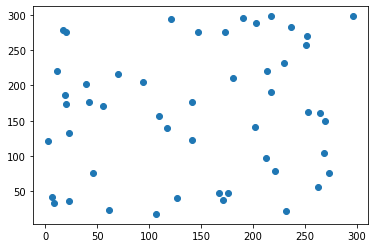

In [334]:
cityList = []
df_raw = []
for i in range(0,50):
    x = int(random.random() * 300)
    y = int(random.random() * 300)
    cityList.append(City(x, y))
    df_raw.append([x,y])
df = pd.DataFrame(df_raw, columns=['X','Y'])

plt.scatter(df.X, df.Y)

Initial distance: 6386.741861347374
The objective value(distance) is: 2671.193906589278


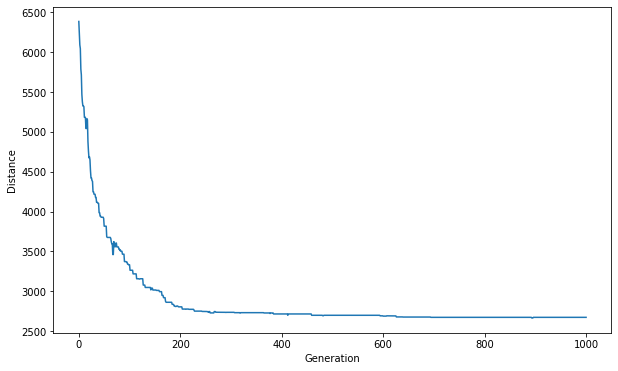

In [335]:
bestroute, animation = geneticAlgorithm(population=cityList,
                popSize=1000,
                eliteSize=15,
                mutationRate=0.01,
                generations=1000,
                plot_fitness=True,
                plot_route=True)

## Create Animation 

In [336]:
import glob
file = glob.glob('graph/*.jpg')
file = [(int(j.split('/')[1].split('.')[0]), j) for j in file]
sorted_file = sorted(file, key=operator.itemgetter(0))

In [337]:
import imageio
images = []
for filename in sorted_file:
    images.append(imageio.imread(filename[1]))
imageio.mimsave('graph/animation.gif', images, fps = 17,)

## Limitations

In general, **evolutionary algorithms, including genetic algorithms, belong to the non-deterministic class of algorithms. Therfore, there's `no guarantee of finding global maxima`**. However, it can find a good solution that is at least not too far away from the optimal. To look for the best result, you can concatenate your genetic algorithm with a local search algorithm to explore the neighborhood more. In more simple problems, deterministic algorithms are usually easier to implement and less resource intensive.


**Other limitations of genetic algorithm is proposed below**:


* **`Sensitive to inital population`**: If the initail population is too constrained to certain portion in the entire feasible region, the genetic algorithm can also be trapped in local optimal. A wide diversity of feasible solutions is a wiser choice for the initial population.


* **`Stochastic`**: Usually evolutionary algorithms have a large stochastic component in the algorithm itself, i.e. initialization and mutation rate. Therefore, you need to find a statistical convergent solution with many more simulations. This should be taken into account if you only have limited amount of time, as the more generation in each algorithm (more time spent on one try), the better the output will be.


* **`Black Art`**: Traditional machine learning methods provide a better way of explaining why the algorithm behaves this way, whereas the genetic algorithm is simply randomly guessing and exploring the solution space. Fine tuning all the parameters, such as like mutation rate, elitism size, and selection parameters, etc, is often just trial and error. Therefore, it is not advisable for problems that require analytical interpretations. 


* **`Quality deteriorates as problem size grows`**: The larger the problem size, the larger the area to be searched by the algorithm. From the discussion above we can easily figure out that the larger the problem size, the harder the algorithm to search all the feasible spaces.


* **`Time for convergence`**: For a complex, computationally-intensive problem, it takes a decent amount of time to get a good solution from this algorithm. In practice, you often run the same algorithm plenty of time since it's not a deterministic approach.


---

## Reference: 

[[Medium] Introduction to Optimization with Genetic Algorithm](https://towardsdatascience.com/introduction-to-optimization-with-genetic-algorithm-2f5001d9964b)

[[Medium] Introduction to Genetic Algorithms — Including Example Code](https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3)

[[Medium] Evolution of a salesman: A complete genetic algorithm tutorial for Python](https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35)

[[Medium] Genetic Algorithms Limitations](https://medium.com/@arbistarkillerllaveshi/genetic-algorithms-summary-limitations-3da8df3e1138)

[[Mathwork] How the genetic algorithm works](https://www.mathworks.com/help/gads/how-the-genetic-algorithm-works.html)

[[TutorialPoint] Genetic Algorithms](https://www.tutorialspoint.com/genetic_algorithms/)

[[Quora] **Dale's answer** on "What are the disadvantage of genetic algorithm?"](https://www.quora.com/What-are-the-disadvantage-of-genetic-algorithm)

[[StackExchange] **Trackmack's answer** on "Genetic Algorithm Minimum Population Size"](https://cs.stackexchange.com/questions/34019/genetic-algorithm-minimum-population-size/35533#35533)

[[StackExchange] **VZN's and Deong's answers** on "Standard Parameters for Genetic Algorithms"](https://cs.stackexchange.com/questions/13062/standard-parameters-for-genetic-algorithms)

[[ResearcherGate] **Borhan's answer** on "Why is the mutation rate in genetic algorithms very small?"](https://www.researchgate.net/post/Why_is_the_mutation_rate_in_genetic_algorithms_very_small)

[[ResearcherGate] **Antonino's and Rajesh's answers** on "How can I choose the genetic algorithm parameters( type of selection, mutation, crossover) that make quick convergence ?"](https://www.researchgate.net/post/How_can_I_choose_the_genetic_algorithm_parameters_type_of_selection_mutation_crossover_that_make_quick_convergence)

[[ResearcherGate] **Bradley's, Andrea's, and Ruhul's answers** on "What are the limitations of genetic algorithms in solving problems with optimal solution?"](https://www.researchgate.net/post/What_are_the_limitations_of_genetic_algorithms_in_solving_problems_with_optimal_solution)

[[ResearcherGate] **Hirad's answer** on "How can I decide the stopping criteria in Genetic Algorithm?"](https://www.researchgate.net/post/How_can_I_decide_the_stopping_criteria_in_Genetic_Algorithm)